In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import yaml
from scipy.stats import spearmanr, pearsonr
from sklearn.metrics import precision_recall_curve, roc_curve, average_precision_score, roc_auc_score

%matplotlib inline

In [2]:
perp_fp_fmt = '/fs/cbcb-lab/rob/students/noor/shoal_proj/swim/perp_shoal_uni_fac/vb=1e0/c={w}/{rep}_{cond}/{fold}/perplexity.yml'

In [3]:
REPLICATES = list(range(1,7))
COND = [1,2]
shoal_params = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]

In [4]:
def arr_spearman(A, B):
    return spearmanr(A, B).correlation

# Perplexities

In [5]:
def perplexity_plot(rep, cond, shoal_priors, folds):
    df = pd.DataFrame()
    for shoal_prior in shoal_priors:
        #folds_rhos = []
        for fold in range(1, folds + 1):
            #print(perp_fp_fmt.format(rep=rep, cond=cond, vb=vb_prior, fold=fold))
            with open(perp_fp_fmt.format(rep=rep, cond=cond, w=shoal_prior, fold=fold), 'r') as f:
                perp_result = yaml.safe_load(f)
            #folds_rhos.append(rho)
            _c = float(shoal_prior)
            df = df.append(dict(perplexity=perp_result['smoothed_perplexity'],
                                shoal_weight=_c, log_shoal_prior = np.log10(_c),
                                fold=fold), 
                           ignore_index=True)
    
    fig, ax = plt.subplots(1, 1, figsize=(10, 7))
    ax.set_title('Sample {}_{}'.format(rep, cond), fontsize=20)
    sns.lineplot(x="log_shoal_prior", y="perplexity", data=df, ax=ax, units="fold", estimator=None, color='#AAAAAA')
    sns.lineplot(x="log_shoal_prior", y="perplexity", data=df, ax=ax, err_style=None, lw=3, color="red")
    
    ax.set_ylabel('Perplexity', fontsize=20)
    ax.set_xlabel('Log shoal prior size', fontsize=20)
    ax.tick_params(axis='both', which='major', labelsize=15)

    plt.show()
    
    
    return ax

#perplexity_plot(SAMPLES[0], VB_PRIORS, 5)

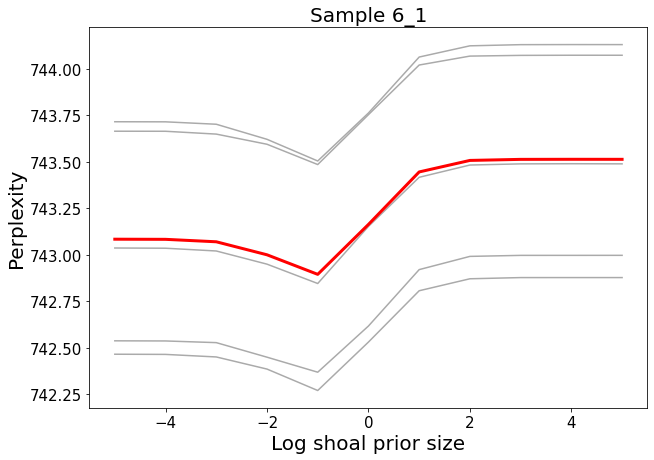

In [6]:
p=perplexity_plot("6","1", shoal_params, 5)

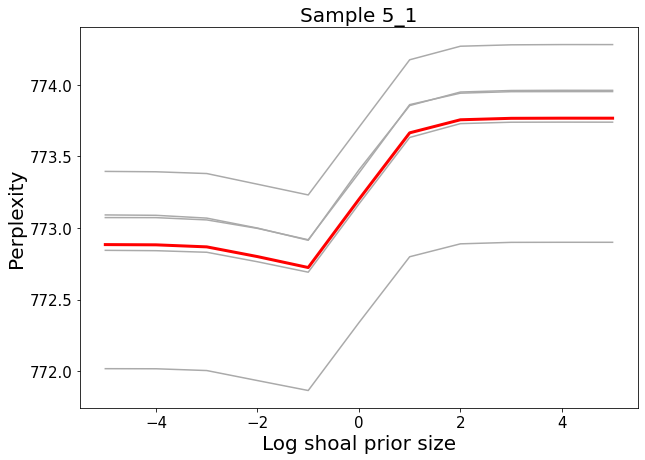

In [7]:
p=perplexity_plot("5","1", shoal_params, 5)

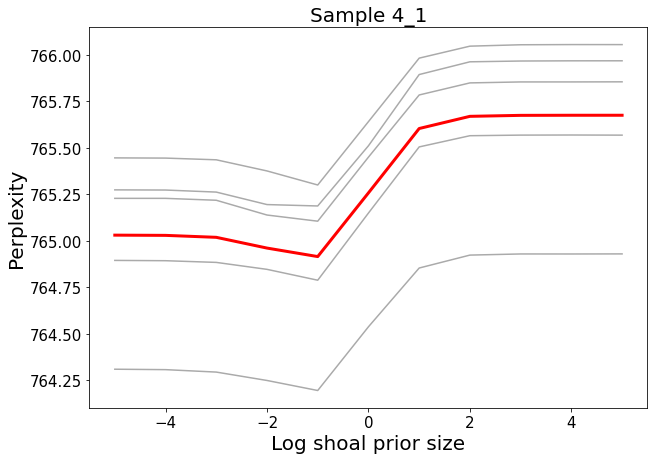

In [8]:
p=perplexity_plot("4","1", shoal_params, 5)

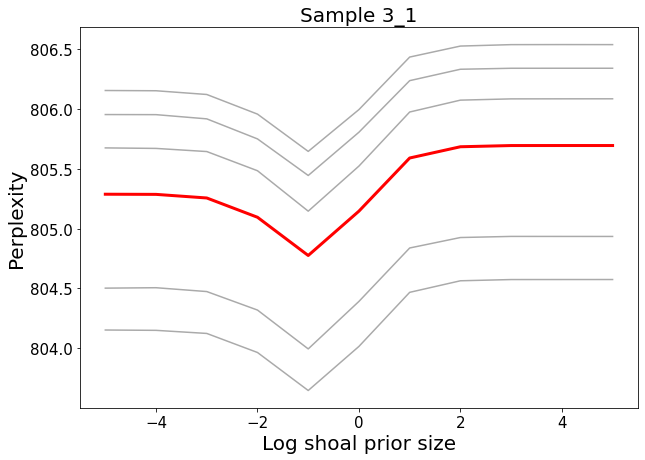

In [9]:
p=perplexity_plot("3","1", shoal_params, 5)

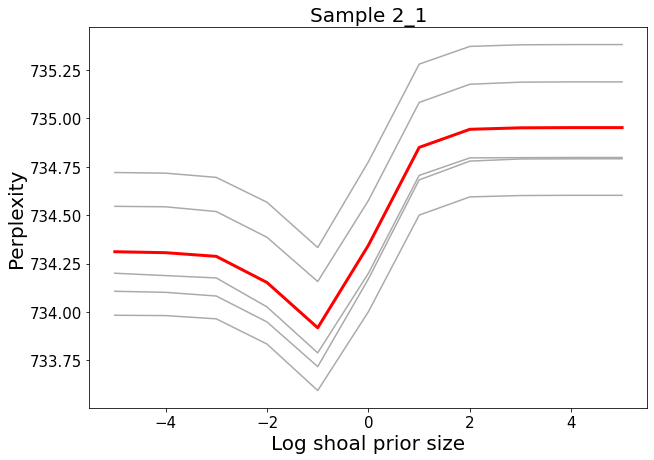

In [10]:
p=perplexity_plot("2","1", shoal_params, 5)

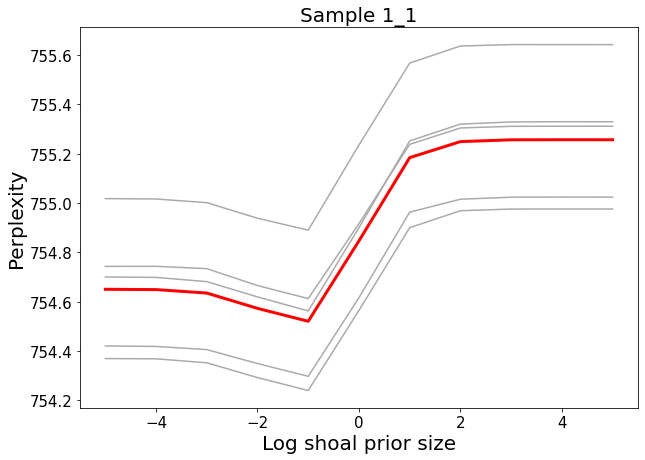

In [11]:
p=perplexity_plot("1","1", shoal_params, 5)

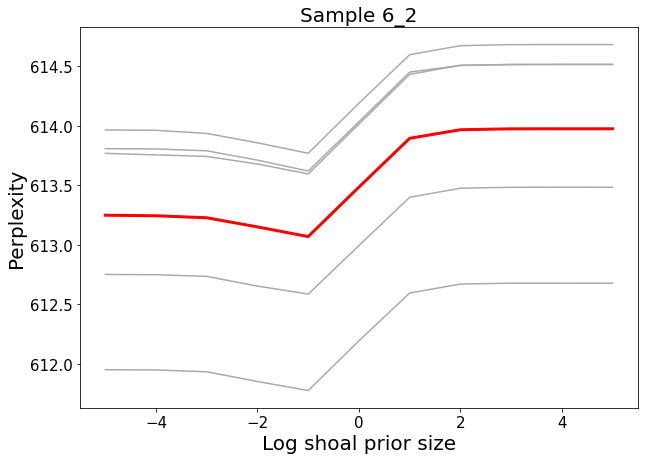

In [10]:
p=perplexity_plot("6","2", shoal_params, 5)

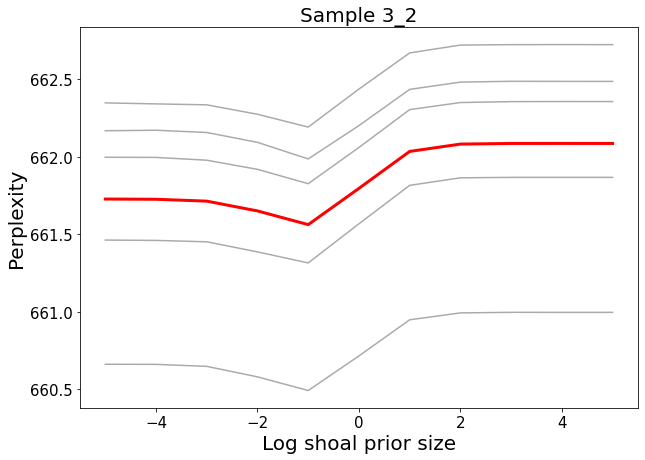

In [9]:
p=perplexity_plot("3","2", shoal_params, 5)